# Train 


In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


import matplotlib.pyplot as plt 
import random
import cv2
import os
import time
print(os.listdir("/Users/tasiabueno/Documents/Thesis//Data_ff"))

[&#39;.DS_Store&#39;, &#39;test&#39;, &#39;train&#39;]


In [2]:
#Create x_train,x_test, y_train, y_test 
train_dir = "/Users/tasiabueno/Documents/Thesis/Data_ff/train" 
test_dir ="/Users/tasiabueno/Documents/Thesis/Data_ff/test"
CATEGORIES = ["Negative", "Positive"] 
#
Files_train =[]
Files_test = []
#
X_train= []
y_train= []
#
X_test = []
y_test = []

In [17]:
from random import shuffle

def shuffle_data(directory,DP):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array =(os.path.join(path,img)) 
            DP.append([img_array,class_num])
    random.shuffle(DP)

def create_data(files,X,y):
    for i in range(len(files)):
        y.append(files[i][1])
        img_array= cv2.imread(files[i][0], 0)
        img_array_resized = cv2.resize(img_array, (28,28))
        X.append(img_array_resized)

def predict(model, X):
    prob_pred = model.predict(X)
    return prob_pred
    

In [4]:
start_time = time.time()
#
shuffle_data(train_dir,Files_train)
create_data(Files_train,X_train,y_train)
# 
shuffle_data(test_dir,Files_test)
create_data(Files_test,X_test,y_test)
#
print("--- %s seconds ---" % (time.time() - start_time))

--- 35.392348766326904 seconds ---


In [5]:
X_train = np.array(X_train).reshape(-1,28,28,1)
y_train = np.array(y_train)
#
X_test  = np.array(X_test).reshape(-1,28,28,1)
y_test  = np.array(y_test)
#
X_train = X_train / 255
X_test = X_test / 255
#
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]

(32000, 8000, 32000, 8000)

In [7]:
from Models import LeNet
from MC import MCDropout,Lenet_MCDropout

In [8]:
CNN_D = LeNet()
CNN_D.model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)     

In [9]:
CNN_MD  = Lenet_MCDropout()
CNN_MD.model.summary()

Model: &quot;sequential_1&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
mc_dropout (MCDropout)       (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
mc_dropout_1 (MCDropout)     (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)   

In [10]:
lenet1 = LeNet().fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
427/427 [==============================] - 21s 48ms/step - loss: 0.5560 - accuracy: 0.7180 - val_loss: 3.1645 - val_accuracy: 0.4992
Epoch 2/10
427/427 [==============================] - 22s 52ms/step - loss: 0.3528 - accuracy: 0.8471 - val_loss: 5.8240 - val_accuracy: 0.4994
Epoch 3/10
427/427 [==============================] - 25s 59ms/step - loss: 0.2436 - accuracy: 0.9003 - val_loss: 14.1581 - val_accuracy: 0.4992
Epoch 4/10
427/427 [==============================] - 23s 54ms/step - loss: 0.1867 - accuracy: 0.9309 - val_loss: 3.3174 - val_accuracy: 0.5497
Epoch 5/10
427/427 [==============================] - 24s 57ms/step - loss: 0.1474 - accuracy: 0.9465 - val_loss: 12.6399 - val_accuracy: 0.4992
Epoch 6/10
427/427 [==============================] - 26s 62ms/step - loss: 0.1234 - accuracy: 0.9569 - val_loss: 4.5682 - val_accuracy: 0.5394
Epoch 7/10
427/427 [==============================] - 25s 58ms/step - loss: 0.0841 - accuracy: 0.9737 - val_loss: 5.8296 - val_accurac

In [38]:
pred = predict(lenet1.model, X_test)

In [25]:
print(pred[0,1].item())

0.0011568838963285089


In [31]:
print(pred[0])

[0.9988431  0.00115688]


In [33]:
print(y_test[0])

[0. 1.]


In [39]:
len(X_test[0])

28

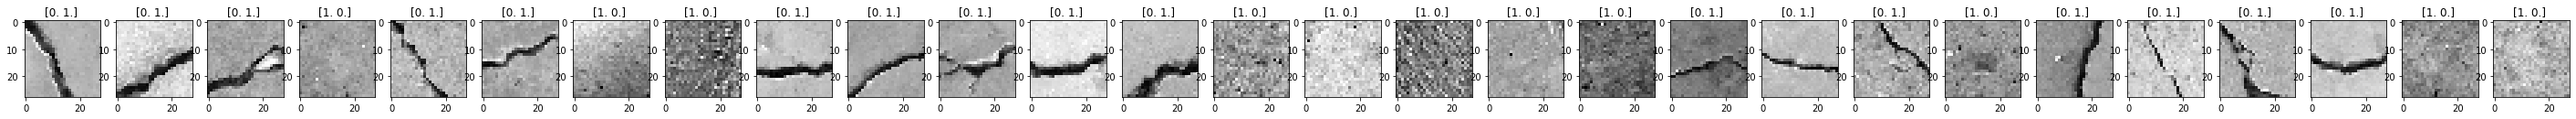

In [52]:
#Print mage with predicted probability and true value 
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, len(X_test[0]))

fig = fig = plt.figure(figsize=(50, 2))
for i in range(len(X_test[0])):
    ax = fig.add_subplot(gs[i])
    ax.imshow(X_test.squeeze()[i], cmap='gray');
    ax.set_title("{} ".format(y_test[i]))